<a href="https://colab.research.google.com/github/Susanati/AnaliseDados_previsao_precos_habitacao/blob/main/previsao_precos_habitacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de preços de habitação**

fonte: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/code?resource=download

# Sobre este arquivo
*Este conjunto de dados fornece os principais recursos para prever os preços das casas, incluindo área, quartos, banheiros, andares, comodidades como ar-condicionado e estacionamento e informações sobre o status do mobiliário. Ele permite análise e modelagem para entender os fatores que afetam os preços das casas e desenvolver previsões precisas nos mercados imobiliários.*

#**objetivo :**

*   prever os preços das habitações com base em atributos específicos?
*   classificar as habitações em grupos com diferentes faixas de preços?



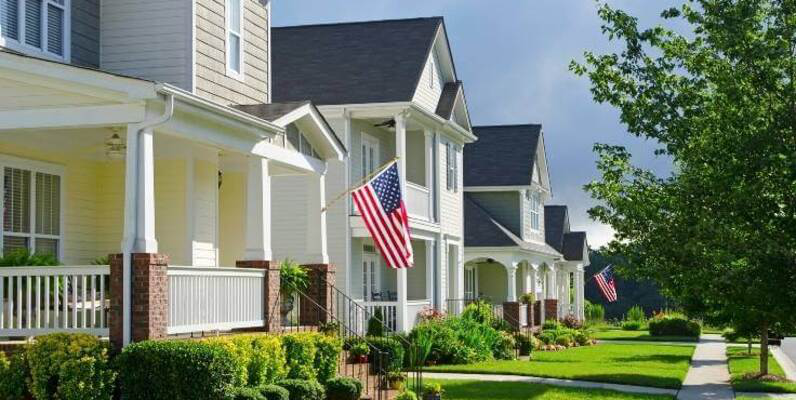

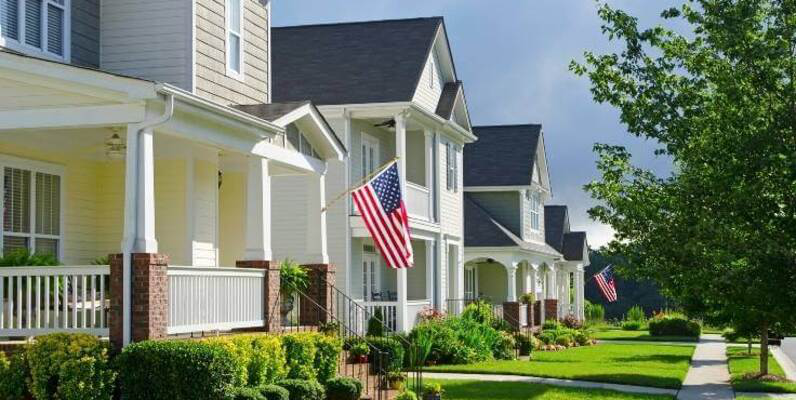

In [ ]:
#reconhecimento imagem.
from PIL import Image
%matplotlib inline
img = Image.open("/content/dataset-cover.jpeg")
img.show()
img

# **Coleta de dados**

In [ ]:
#arquivos zip
from zipfile import ZipFile

file= '/content/archive (2).zip'

with ZipFile (file, 'r') as zip:
      zip.printdir()
      zip.extractall()

File Name                                             Modified             Size
Housing.csv                                    2023-07-07 04:34:24        29981


# **Importação Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Verificação dados Coletados**

In [ ]:
#arquivo csv

#importação pandas
import pandas as pd
#ler arquivo csv
df = pd.read_csv ('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **Data Frame Original**

In [ ]:
print("DataFrame original:")
print(df)

DataFrame original:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hot

# **Renomeação Titulo Tabela**

In [ ]:
#Renomeação Titulos tabela.
df.rename(columns={'price':'preco', 'area': 'area', 'bedrooms':'quartos', 'bathrooms':'banheiros', 'stories':'andares', 'mainroad':'estrada principal', 'guestroom':'quarto de hospedes', 'basement':'porao','hotwaterheating':'aquecimento de agua quente','airconditioning':'ar condicionado','parking':'estacionamento','prefarea':'pré-farea','furnishingstatus':'status de mobilia'}, inplace=True)

In [ ]:
print("DataFrame renomeada:")
print(df)

DataFrame renomeada:
        preco  area  quartos  banheiros  andares estrada principal  \
0    13300000  7420        4          2        3               yes   
1    12250000  8960        4          4        4               yes   
2    12250000  9960        3          2        2               yes   
3    12215000  7500        4          2        2               yes   
4    11410000  7420        4          1        2               yes   
..        ...   ...      ...        ...      ...               ...   
540   1820000  3000        2          1        1               yes   
541   1767150  2400        3          1        1                no   
542   1750000  3620        2          1        1               yes   
543   1750000  2910        3          1        1                no   
544   1750000  3850        3          1        2               yes   

    quarto de hospedes porao aquecimento de agua quente ar condicionado  \
0                   no    no                         no        

# **Limpeza e pré-processamento dos dados:**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#importação pandas
import pandas as pd
#ler arquivo csv
df = pd.read_csv ('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [28]:
#verificar a presença de valores nulos (dados ausentes) em um DataFrame
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [31]:
pip install seaborn

In [48]:
data = pd.read_csv ('/content/Housing.csv')

In [49]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


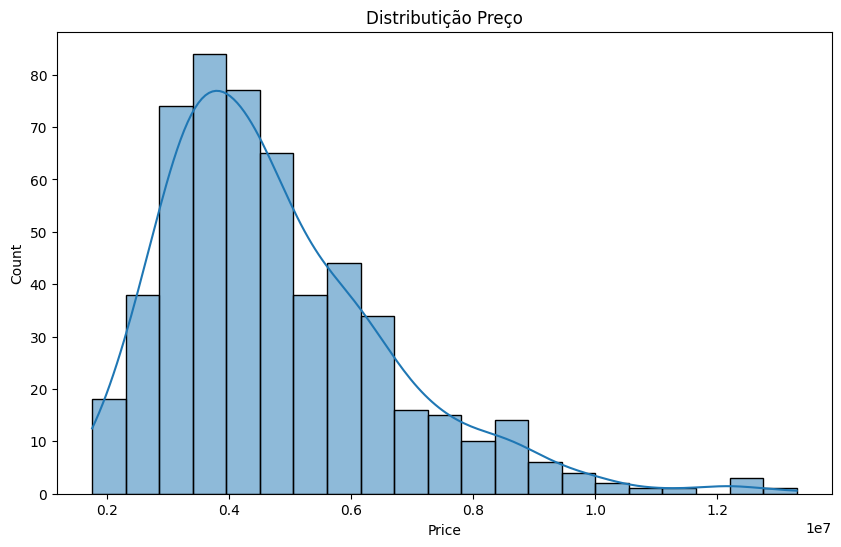

In [54]:
#distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distributição Preço")
plt.show()

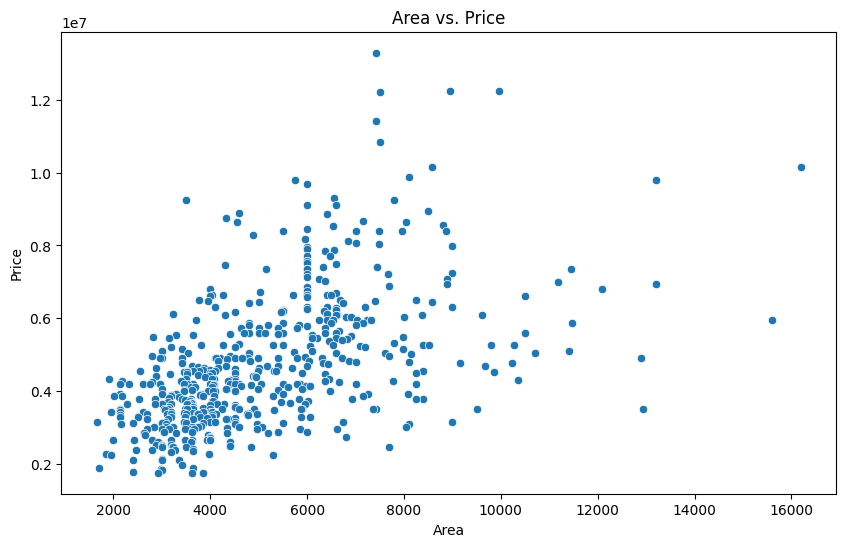

In [56]:
#Preços por area
plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=data)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.show()

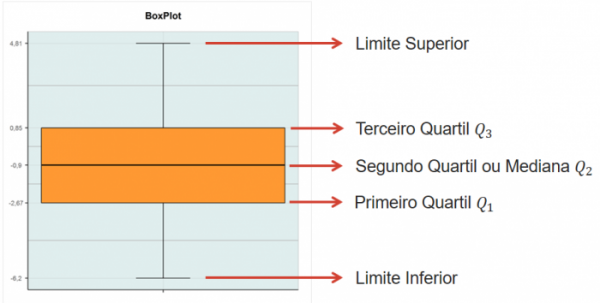

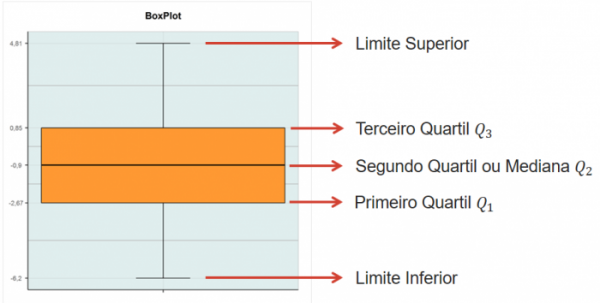

In [59]:
#reconhecimento imagem.
from PIL import Image
%matplotlib inline
img = Image.open("//content/boxplot.png")
img.show()
img

fonte: http://labtrop.ib.usp.br/doku.php?id=cursos:planeco:roteiro:05-descr_base

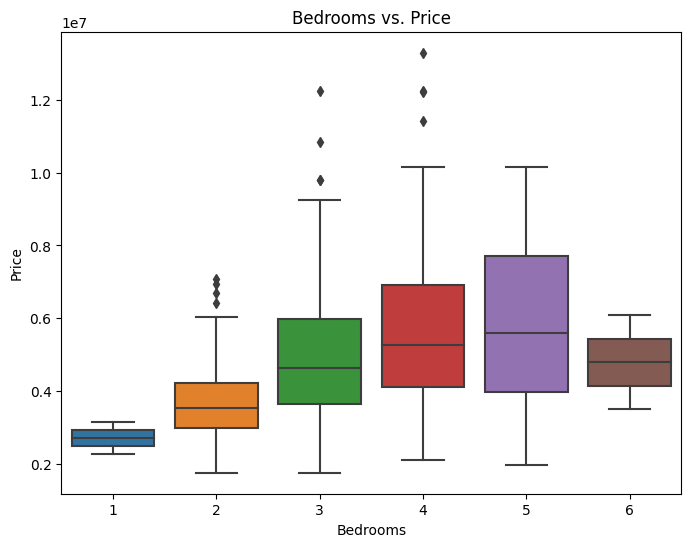

In [57]:
#preços por Quartos de dormir
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=data)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

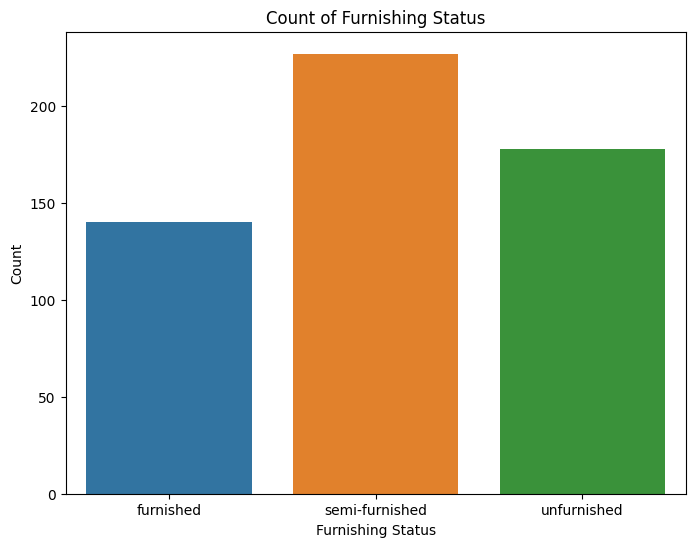

In [58]:
#Status mobiliado, semimobiliado e não mobiliado
plt.figure(figsize=(8, 6))
sns.countplot(x="furnishingstatus", data=data)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Furnishing Status")
plt.show()

<ipython-input-60-0d047630e175>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


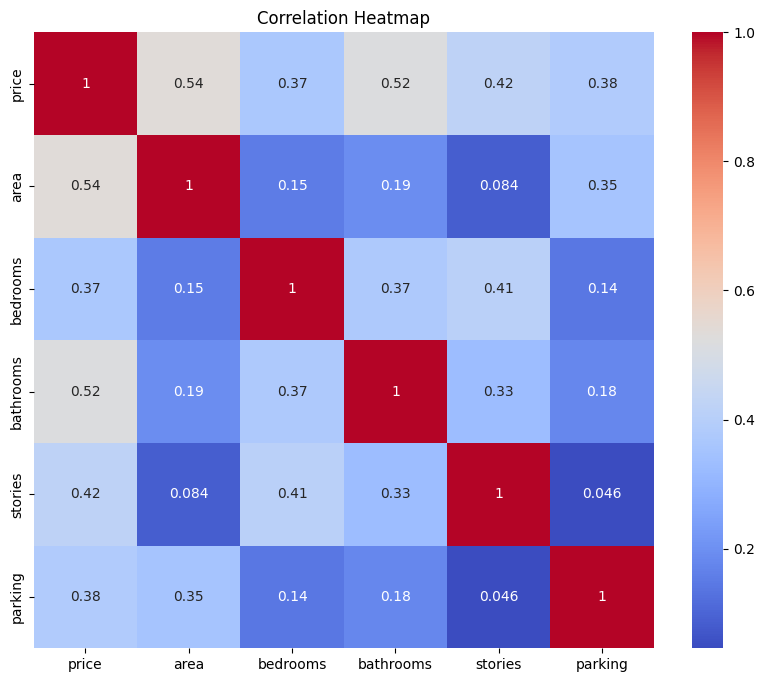

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

fonte: https://opencodecom.net/post/2021-09-01-correlacao-entre-ativos-no-python/


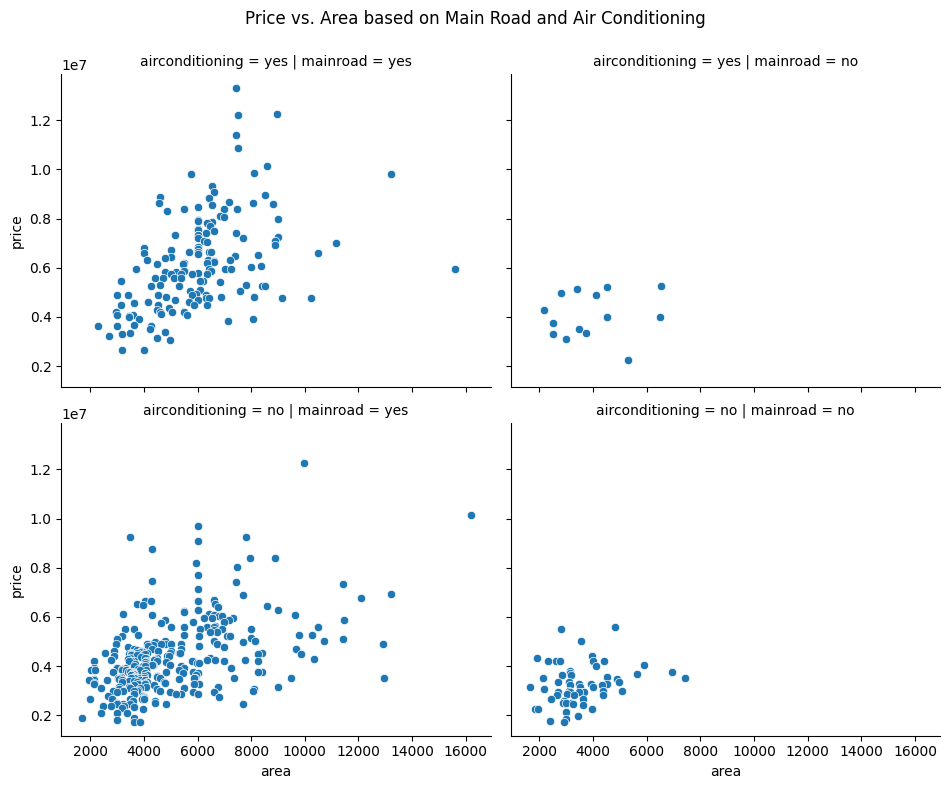

In [61]:
#Preço vs. Área com base na Estrada Principal e Ar Condicionado
g = sns.FacetGrid(data, col="mainroad", row="airconditioning", height=4, aspect=1.2)
g.map(sns.scatterplot, "area", "price")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Price vs. Area based on Main Road and Air Conditioning")
plt.show()